<a href="https://www.kaggle.com/code/abdalrhamnhebishy/vegtabiles-vs-fruits-classification?scriptVersionId=192865413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #FF0000 ;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }


 video {
    width: 800px; /* Set the width of the video */
    height: 400px; /* Adjust the height automatically */
    border-radius: 25px; /* Add a border radius for rounded corners */
    border: 5px solid #eee; /* Add a border */
    box-shadow: 0 10px 20px rgba(0, 0, 0, 0.19), 0 6px 6px rgba(0, 0, 0, 0.23); /* Add a box shadow */
    display: flex;
    align-items: center;
    justify-content: center;
    transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
  }

  video:active {
    box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
  }


</style>
''')

## Data Information :

<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">
<p> 

   * This dataset encompasses images of various fruits and vegetables, providing a diverse collection for image recognition tasks.

   * The included food items are:

        * Fruits: Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango

        * Vegetables: Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean,           Cauliflower, Bell Pepper,  Chilli Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas

   * The dataset is organized into three main folders:

     - Train: Contains 100 images per category.

     - Test: Contains 10 images per category.

     - Validation: Contains 10 images per category.     
    
</p>
</div>

In [5]:
from IPython.display import Video
video_path = "https://media.istockphoto.com/id/508299409/video/vegetables.mp4?s=mp4-640x640-is&k=20&c=kQLbLnmwJ1wiU4yXzTAYwU3SzKKOh9K9b4KlHQrC6XQ="
Video(video_path)

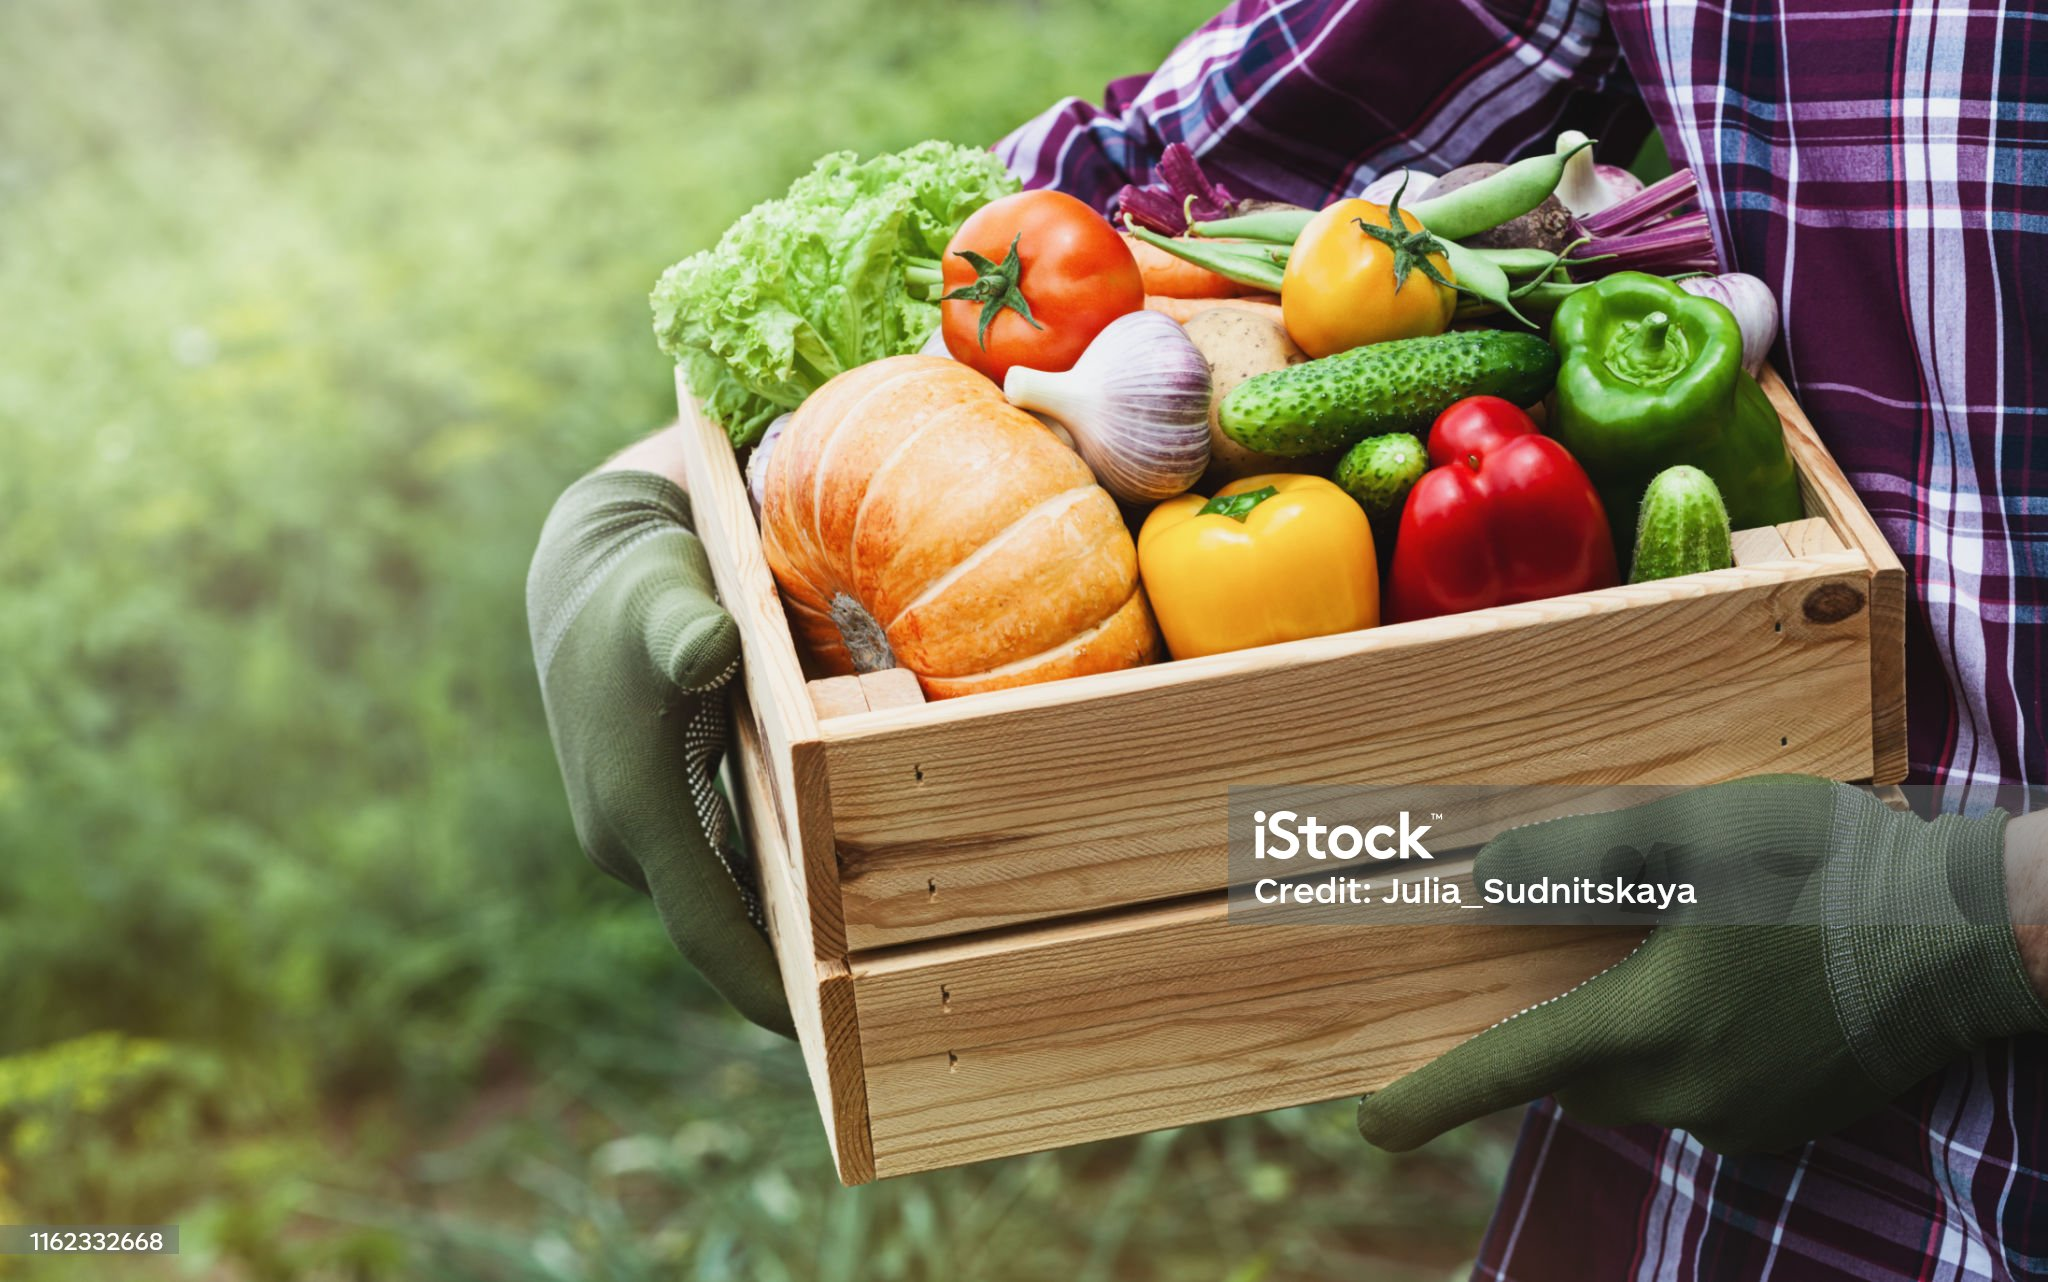

In [30]:
#image1 :

from IPython.display import display ,Image
img1=Image("img2.jpg")
display(img1)

## Introudction :

<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">
<p> 

    
-->  Welcome with you in my Notebook :

* This unstructured Data loaded from Kaggle . 

* This problem consider as Multi Classification images . 

* I used Deep learning Techniques by using tensorflow pkgs .

* I divide Data into train set & testset after loading the data.

* I used ImageDataGenerator for preprocessing the Data .

* I make CNN models using Tensorflow , visualization tne model.  
    
</p>
</div>

## imports :

In [4]:
# imports :
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback
from tensorflow .keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.image as mpimg
import PIL
import PIL.Image

2024-08-16 03:26:13.799001: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-08-16 03:26:13.800410: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-16 03:26:13.826443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-16 03:26:13.827007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-08-16 03:26:14.271688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## preparing & Loading the Data :

In [5]:
# loading the folders (train ,test ,validation):

#! unzip train.zip
#! unzip test.zip
#! unzip validation.zip

In [6]:
# Paths to data directories
train_data_path = 'train'
val_data_path = 'Val'
test_data_path = 'test'

In [7]:
import os
import glob
from PIL import Image

# Paths to data directories
train_data_path = 'train'
val_data_path = 'Val'
test_data_path = 'test'

# Function to load data from a directory
def load_data_from_directory(directory):
    data = []
    labels = []
    class_names = []
    
    # Iterate through subfolders
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        
        # Ensure it's a subfolder and not a file
        if os.path.isdir(subfolder_path):
            # Find all files in the subfolder
            files = glob.glob(os.path.join(subfolder_path, '*'))
            
            # Iterate through files
            for file_path in files:
                # Check the file extension to determine the file type
                if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
                    # Load image files
                    with Image.open(file_path) as image:
                        data.append(image)
                        labels.append(subfolder)
                else:
                    print(f"Skipping unsupported file type: {file_path}")
            
            # Add the subfolder name to class_names if it's not already there
            if subfolder not in class_names:
                class_names.append(subfolder)
    
    return data, labels, class_names



In [8]:
# Load data from train, val, and test directories
train_data, train_labels, train_class_names = load_data_from_directory(train_data_path)
val_data, val_labels, val_class_names = load_data_from_directory(val_data_path)
test_data, test_labels, test_class_names = load_data_from_directory(test_data_path)
# Print the class names
print(f"Classes Number: {len(train_class_names)} Class")

Classes Number: 36 Class


In [9]:
# Print the Number of images inside  each set :

print(f"Number of training samples: {len(train_data)} images")
print(f"Number of validation samples: {len(val_data)} images")
print(f"Number of test samples: {len(test_data)} images")



Number of training samples: 3115 images

Number of validation samples: 351 images

Number of test samples: 359 images


In [10]:

# Calculate the shape of each dataset
train_shapes = [image.size for image in train_data]
val_shapes = [image.size for image in val_data]
test_shapes = [image.size for image in test_data]

# Print the shapes of each set
print(f"Shape of training samples: {train_shapes}")
print(f"Shape of validation samples: {val_shapes}")
print(f"Shape of test samples: {test_shapes}")



Shape of training samples: [(1000, 667), (1000, 1000), (7360, 4912), (780, 1170), (1200, 682), (1600, 1066), (4536, 3744), (350, 224), (1300, 1035), (1700, 1249), (1200, 909), (2816, 2112), (700, 544), (420, 326), (3648, 2736), (1316, 878), (1063, 1600), (914, 1218), (4608, 3072), (750, 750), (4373, 4294), (1200, 1200), (1200, 762), (808, 730), (1200, 785), (1000, 1000), (1024, 1024), (600, 900), (1200, 902), (400, 400), (808, 730), (1600, 1200), (355, 355), (735, 1101), (4608, 3456), (1024, 1004), (700, 700), (1000, 1000), (1000, 986), (638, 638), (1280, 720), (785, 393), (800, 809), (2678, 4027), (1080, 1050), (3872, 2592), (1200, 800), (700, 700), (1024, 1024), (1047, 717), (1024, 768), (2304, 3456), (1024, 681), (1316, 878), (3600, 2282), (1200, 900), (400, 309), (300, 300), (300, 400), (1000, 1000), (800, 600), (720, 1080), (500, 500), (1200, 848), (250, 268), (654, 461), (1600, 1200), (2037, 1669), (709, 900), (1024, 1024), (968, 1296), (720, 1080), (1000, 667), (230, 234), (1533

## Show a sample of Random sample of Train data:

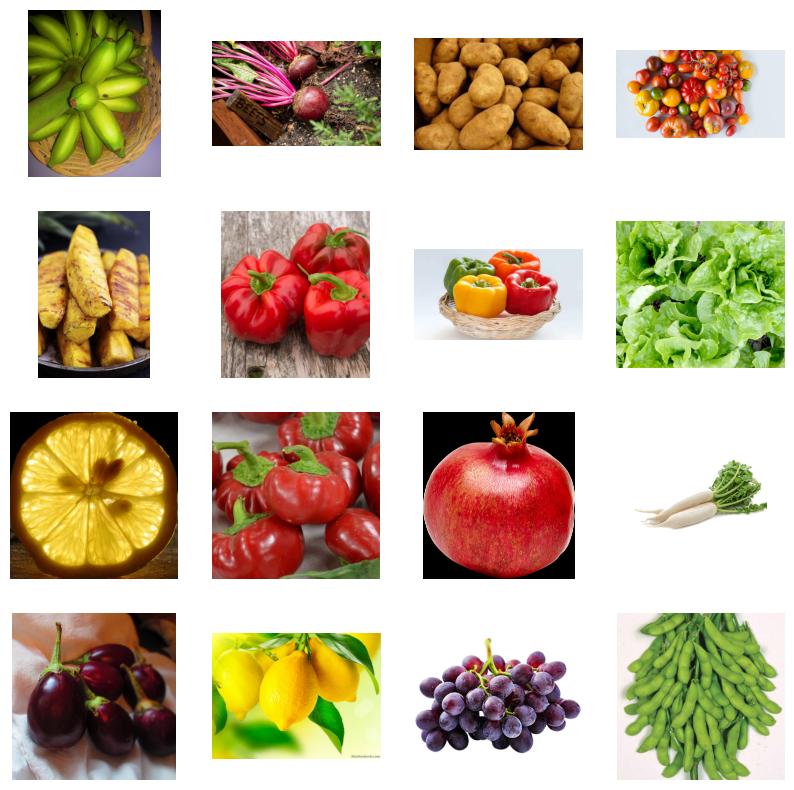

In [11]:
# Get the list of all subdirectories (classes)
classes = os.listdir(train_data_path)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(train_data_path, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

## preprocessing :

In [12]:
# Make Agumention on the train &  valdition data set :
#preprocessing both of train & validation data :
#target_size=(128,128)

train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
            )

train_generator=train_datagen.flow_from_directory(
    train_data_path,
    target_size=(128,128),
    batch_size=30,
    color_mode='grayscale',
    class_mode="categorical"
)

test_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
            )

test_generator=test_datagen.flow_from_directory(
    test_data_path,
    target_size=(128,128),
    batch_size=30,
    color_mode='grayscale',
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.

Found 359 images belonging to 36 classes.


In [13]:
# preprocessing the data :
def reshape_and_normalize(images_data):
     # reshape :
    images=images.reshape(images_data.reshape[0],images_data.reshape[1],images_data.reshape[2],1)
    
    #Normalize :
    images=images_data/255
    return images



In [14]:
# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

## Bulding CNN Model & Training it : ACC = 71 %

In [15]:
# Bulding the model :

model=Sequential([
    # first CNN_layer
    Conv2D(64,(3,3),input_shape=(128,128,1),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # second layer
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #third layer
    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #fourth layer:
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #fifth layer:
    Conv2D(32,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512,activation="relu"),
    BatchNormalization(),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # output layer:

    Dense(36,activation="softmax")
    
])

model.summary()

# compile the model :

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])



callbacks=myCallback()

# training the model :

print("\n model Training :")

history=model.fit(

    train_generator,
    validation_data=test_generator,
    epochs=150,
    verbose=2,
    callbacks=[callbacks]
)


Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 126, 126, 64)      640       

                                                                 

 batch_normalization (Batch  (None, 126, 126, 64)      256       

 Normalization)                                                  

                                                                 

 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         

 D)                                                              

                                                                 

 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     

                                                                 

 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       

 chNormalization)                                                

                                        

2024-08-16 03:26:17.267211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-08-16 03:26:17.267624: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Skipping registering GPU devices...

/home/abdalrahman/.local/lib/python3.8/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images

  warnings.warn(




 model Training :

Epoch 1/150

104/104 - 63s - loss: 3.7110 - accuracy: 0.0716 - val_loss: 3.8136 - val_accuracy: 0.0334 - 63s/epoch - 608ms/step

Epoch 2/150

104/104 - 59s - loss: 3.3245 - accuracy: 0.1085 - val_loss: 4.4121 - val_accuracy: 0.0334 - 59s/epoch - 571ms/step

Epoch 3/150

104/104 - 60s - loss: 3.1942 - accuracy: 0.1252 - val_loss: 4.6496 - val_accuracy: 0.0362 - 60s/epoch - 579ms/step

Epoch 4/150

104/104 - 60s - loss: 3.0941 - accuracy: 0.1477 - val_loss: 4.1150 - val_accuracy: 0.0529 - 60s/epoch - 574ms/step

Epoch 5/150

104/104 - 60s - loss: 3.0432 - accuracy: 0.1541 - val_loss: 3.4548 - val_accuracy: 0.0919 - 60s/epoch - 573ms/step

Epoch 6/150

104/104 - 60s - loss: 2.9457 - accuracy: 0.1814 - val_loss: 3.4042 - val_accuracy: 0.1086 - 60s/epoch - 573ms/step

Epoch 7/150

104/104 - 60s - loss: 2.8656 - accuracy: 0.1952 - val_loss: 4.6393 - val_accuracy: 0.0780 - 60s/epoch - 575ms/step

Epoch 8/150

104/104 - 61s - loss: 2.8089 - accuracy: 0.2061 - val_loss: 3.9

In [17]:
print("\n Model Prediction :")
y_predict=model.predict(test_generator)
y_predict[:10]



 Model Prediction :

12/12 [==============================] - 8s 660ms/step


array([[3.14999744e-03, 8.34020830e-06, 1.91778654e-05, 5.95899008e-04,
        1.37068389e-04, 2.00371098e-04, 5.22432337e-08, 4.56365524e-06,
        1.15875970e-03, 2.47125104e-06, 1.97114144e-02, 6.37550329e-06,
        5.61762572e-05, 3.22918422e-05, 1.87920463e-07, 5.02710231e-04,
        7.86437886e-05, 9.89445766e-07, 2.41030328e-04, 4.38437601e-05,
        5.14151579e-05, 5.03955050e-07, 2.22437302e-04, 5.34458231e-05,
        4.60321132e-07, 2.56002272e-06, 2.37901440e-06, 4.84261574e-04,
        9.90456647e-06, 1.75898958e-06, 2.68893982e-05, 1.19223114e-06,
        2.13102298e-03, 2.76527808e-05, 7.08537918e-05, 9.70962822e-01],
       [4.75432433e-04, 2.61390377e-02, 1.80098286e-03, 2.57250178e-03,
        1.20589131e-04, 2.92587164e-03, 4.50564781e-03, 5.90584183e-04,
        5.31953340e-03, 6.94419563e-01, 1.05689503e-02, 4.60703624e-03,
        6.88310130e-04, 1.23822056e-02, 2.62415560e-04, 9.46201757e-03,
        1.13094691e-03, 5.24462899e-04, 2.65885115e-04, 3.32351

In [18]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 6.31255984984147e-12 

 the max_value for prediction --->>> 0.9999810457229614 


## Result OF Training:

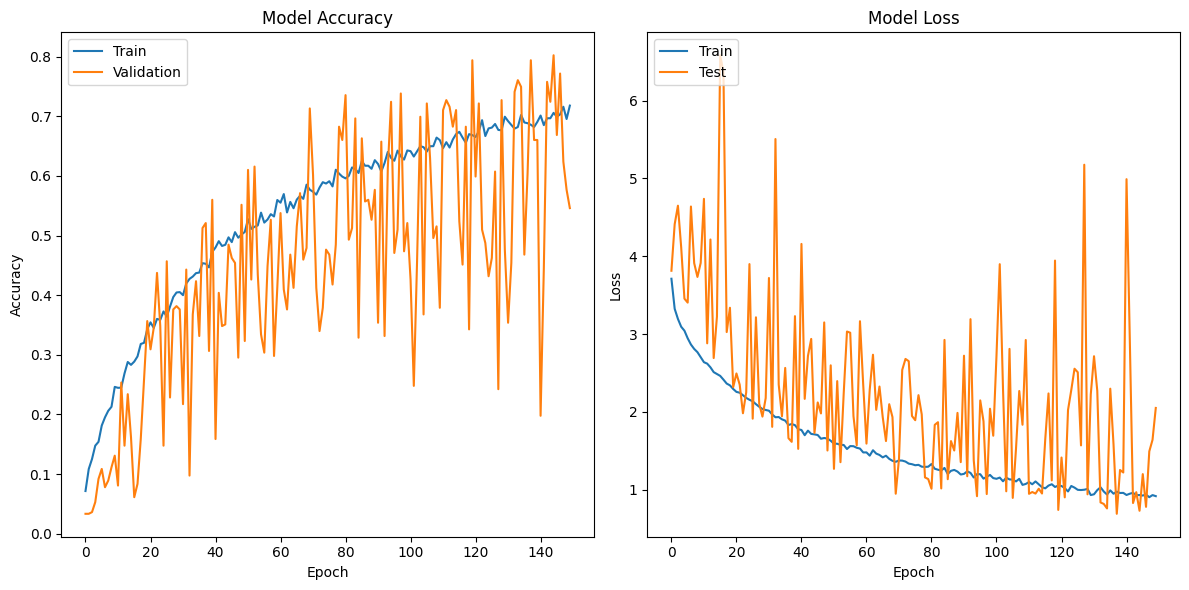

In [20]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Save & load the CNN model :

In [21]:
# Save the model
model.save('Vegtables_Fruits.h5')

# Load the trained model
model = tf.keras.models.load_model('Vegtables_Fruits.h5')

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


## Visualization of the CNN Model :

In [22]:
! pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable









   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 3.6 MB/s eta 0:00:003.9 MB/s eta 0:00:01




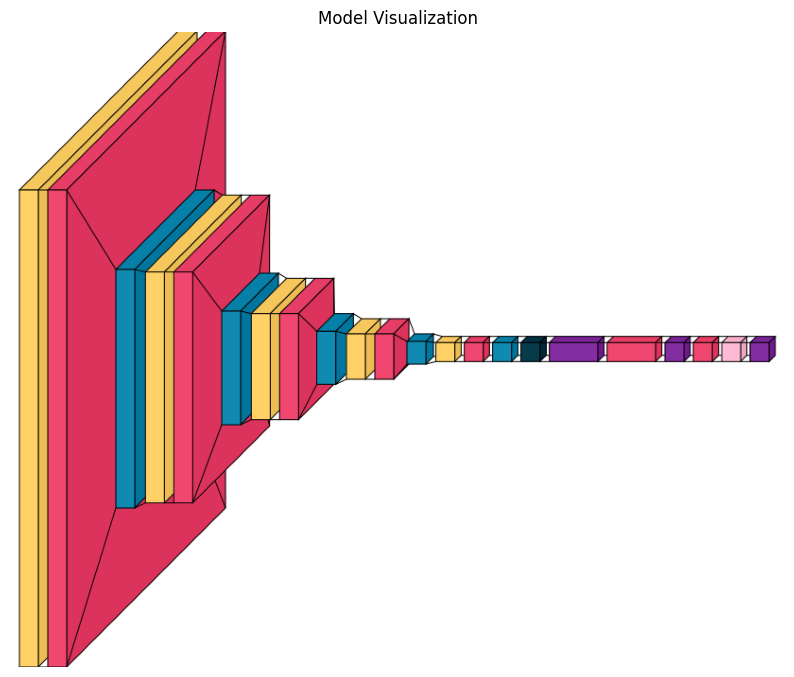

In [24]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model Visualization")
plt.axis('off')
plt.show()

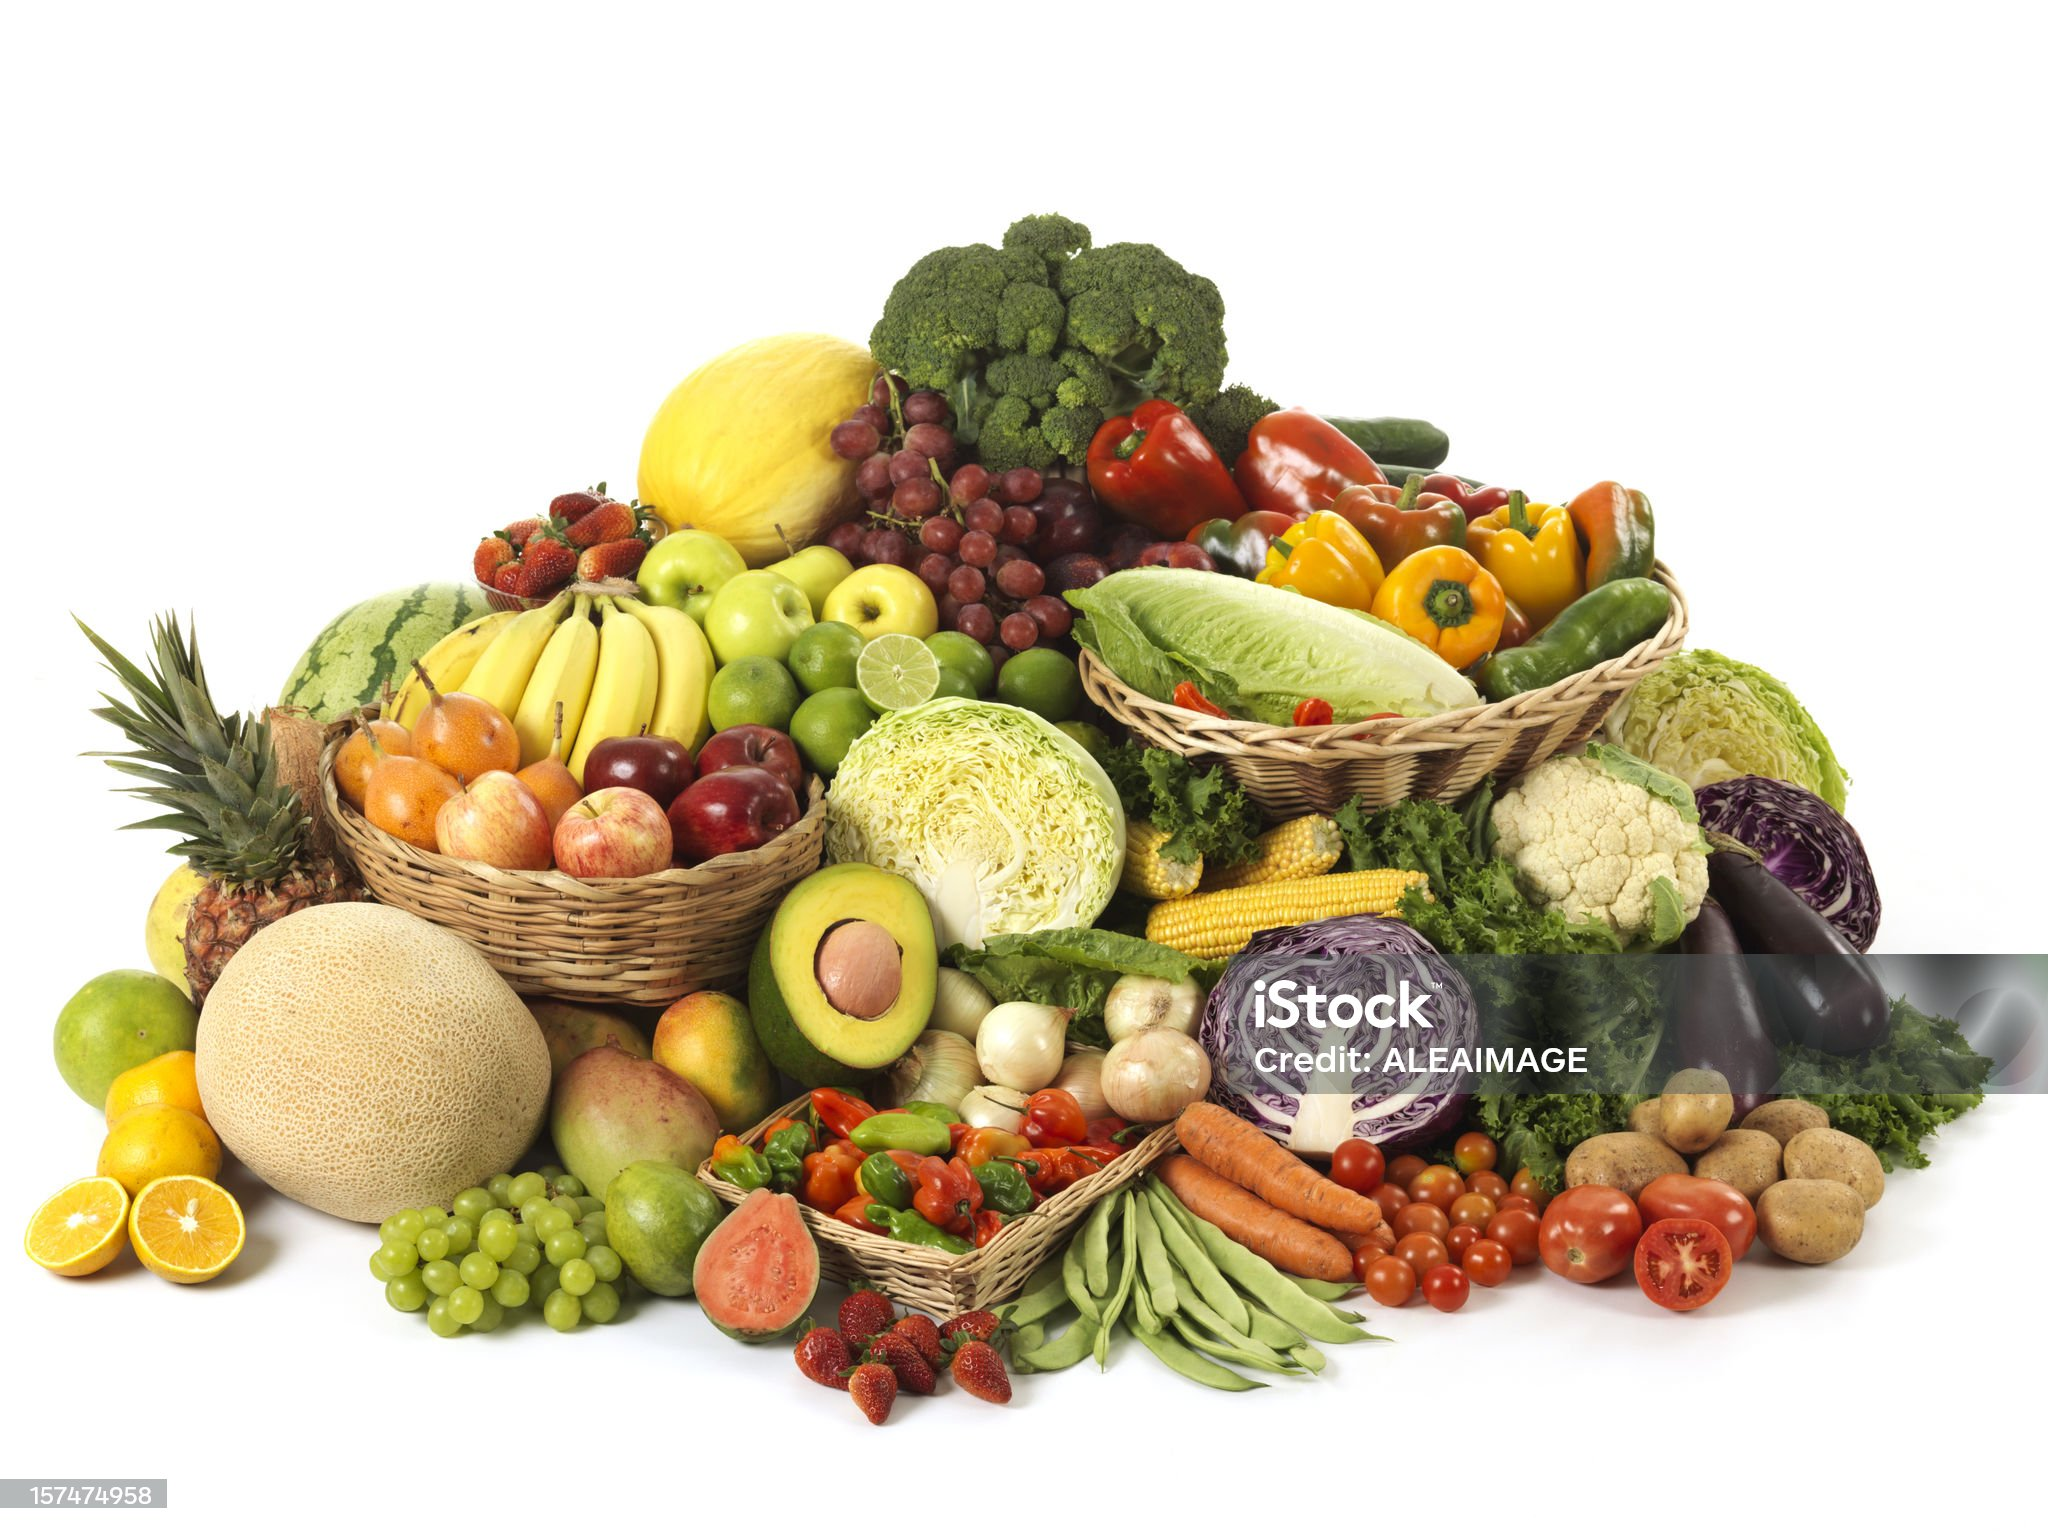

In [31]:
img2=Image("img1.jpg")
display(img2)

## Conclusion 
<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">
<p> 

* Thank you for reading this notebook! If you found this content useful, please consider giving it an upvote.

* Your support is greatly appreciated! .

* (https://www.kaggle.com/abdalrhamnhebishy), [Kaggle profile] .

*  AbdalRhman Hebishy , DataScientist & Machine learning  Specialist 
   
</p>
</div>
